In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [18]:
df_3_14 = pd.read_csv("3-14.csv", header = None, names=['name', 'number', 'signal', 'timestamp'])

In [19]:
mapping = {}
count = 0
for idx, row in df_3_14.iterrows():
  if row['number'] in mapping:
    row['number'] = mapping[row['number']]
  else:
    mapping[row['number']] = "Device " + str(count)
    row['number'] = mapping[row['number']]
    count += 1
  df_3_14['number'][idx] = row['number'] 
df_3_14

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


,name,number,signal,timestamp
0,VV6-US-NKA2103A,Device 0,-86,2022-03-07T15:23:54.757
1,NaN,Device 1,-84,2022-03-07T15:23:54.759
2,NaN,Device 2,-77,2022-03-07T15:23:54.761
3,Donald H. Trump,Device 3,-71,2022-03-07T15:23:54.864
4,NaN,Device 4,-86,2022-03-07T15:23:55.196
...,...,...,...,...
3680,NaN,Device 771,-71,Mon Mar 14 11:28:52 CDT 2022
3681,NaN,Device 370,-85,Mon Mar 14 11:28:52 CDT 2022
3682,NaN,Device 885,-75,Mon Mar 14 11:28:52 CDT 2022
3683,NaN,Device 886,-88,Mon Mar 14 11:28:52 CDT 2022


In [20]:
start = np.where(df_3_14['timestamp'] == 'Sun Mar 13 11:36:03 CDT 2022')[0][0]
end = np.where(df_3_14['timestamp'] == 'Sun Mar 13 12:21:41 CDT 2022')[0][0]
df_control = df_3_14[start:end]

In [5]:
start = np.where(df_3_14['timestamp'] == 'Mon Mar 14 10:16:45 CDT 2022')[0][0]
end = np.where(df_3_14['timestamp'] == 'Mon Mar 14 10:30:35 CDT 2022')[0][0]
df_walking_monday = df_3_14[start:end]

start = np.where(df_3_14['timestamp'] == 'Mon Mar 14 10:30:35 CDT 2022')[0][0]
df_reg_monday = df_3_14[start:]

In [6]:
def get_counts(df):
  df_avg = df.groupby('number', as_index=False).mean()

  conditions = [
    (df_avg['signal'] >= -50),
    (df_avg['signal'] < -50) & (df_avg['signal'] >= -70),
    (df_avg['signal'] < -70) & (df_avg['signal'] >= -80),
    (df_avg['signal'] < -80)
  ]
  values = ['strong', 'okay', 'weak', 'poor']

  df_avg['signal_name'] = np.select(conditions, values)

  print(df_avg['signal_name'].value_counts())

In [7]:
def get_strong_okay(df):
  strong_okay = []
  df_avg = df.groupby('number', as_index=False).mean()

  for idx, row in df_avg.iterrows():
    if row['signal'] >= -70:
      strong_okay.append(row['number'])
  return strong_okay

In [8]:
get_counts(df_control)

poor      37
okay       7
weak       5
strong     3
Name: signal_name, dtype: int64


In [9]:
get_counts(df_walking_monday)

weak    57
poor    47
okay    15
Name: signal_name, dtype: int64


In [10]:
get_counts(df_reg_monday)

weak    285
okay    149
poor    107
Name: signal_name, dtype: int64


In [11]:
from datetime import datetime
def trim_timestamp(row_num):
  s = df_control['timestamp'][row_num]
  s = s.replace('Sun Mar 13 ', '')
  s = s.replace(' CDT 2022', '')
  s = '03/13/22 ' + s

  date_time_obj = datetime.strptime(s, '%m/%d/%y %H:%M:%S')

  return date_time_obj

In [ ]:
df_control = df_3_14[start:end]
for idx, row in df_control.iterrows():
  df_control['timestamp'][idx] = trim_timestamp(idx)

In [22]:
dfs = {}
strong_okay = get_strong_okay(df_control)
for name in strong_okay:
  df = df_control.loc[df_control['number'] == name]
  dfs[name] = df

In [23]:
df_control

,name,number,signal,timestamp
2142,NaN,Device 106,-84,2022-03-13 11:36:03
2143,NaN,Device 107,-86,2022-03-13 11:36:04
2144,NaN,Device 108,-86,2022-03-13 11:36:04
2145,NaN,Device 109,-83,2022-03-13 11:36:04
2146,NaN,Device 110,-83,2022-03-13 11:36:04
...,...,...,...,...
2297,NaN,Device 133,-89,2022-03-13 12:21:35
2298,NaN,Device 141,-62,2022-03-13 12:21:36
2299,NaN,Device 138,-45,2022-03-13 12:21:36
2300,NaN,Device 156,-82,2022-03-13 12:21:40


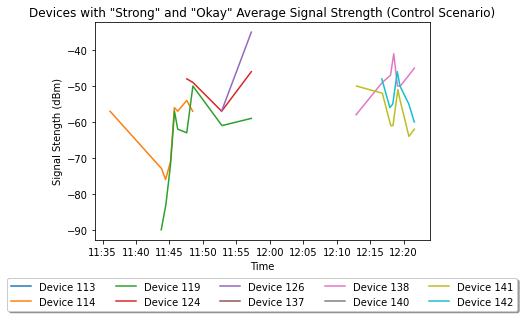

In [25]:
import matplotlib.dates as mdates

fig = plt.figure()
ax = plt.subplot(111)

count = 0
for val in dfs:
  df = dfs[val]
  ax.plot(df['timestamp'], df['signal'], label = val)
  count += 1

plt.title('Devices with "Strong" and "Okay" Average Signal Strength (Control Scenario)')
plt.ylabel("Signal Stength (dBm)")
plt.xlabel("Time")
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))

# Put a legend below current axis
ax.legend(loc='lower center', bbox_to_anchor=(0.5, -0.35),
          fancybox=True, shadow=True, ncol=5)